In [2]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Matplotlib is building the font cache; this may take a moment.


In [56]:
pad10 = pd.read_csv('/novo/projects/departments/cdd/molecular_ai/mlbp/data/fibrillation_data/sbxw_fibrillation_peptide_waltzdb-train-val_serrano-test_randpadded10x_padlen-10.csv')
pad10 = pad10[pad10['dataset'] == 'waltzdb']
pad10 = pad10[pad10['data_split'] == 'train']
pad10 = pad10[pad10['value_bool'] == 1]
data_arr = np.loadtxt('LA_mean_pad10.csv')
print(data_arr.shape)
pad10.head(20)

(13990, 26)


,Unnamed: 0,sequence,value_bool,data_split,dataset,mask,core_sequence,len
2790,2790,NRCDHRPDFVFYIFD,1,train,waltzdb,000000001111110,FVFYIF,15
2791,2791,QFVFYIFHTPD,1,train,waltzdb,01111110000,FVFYIF,11
2792,2792,PKNNTKFVFYIFCSKDQTQ,1,train,waltzdb,0000001111110000000,FVFYIF,19
2793,2793,SDNPSHHFVFYIFR,1,train,waltzdb,00000001111110,FVFYIF,14
2794,2794,HTGFVFYIFKRSN,1,train,waltzdb,0001111110000,FVFYIF,13
2795,2795,KCHKCSKNNTFVFYIFRGPKHCETT,1,train,waltzdb,0000000000111111000000000,FVFYIF,25
2796,2796,QNDPTFVFYIFQRE,1,train,waltzdb,00000111111000,FVFYIF,14
2797,2797,DHCEKCFVFYIFSGQKTPNT,1,train,waltzdb,00000011111100000000,FVFYIF,20
2798,2798,HQDFVFYIFSNGQSHR,1,train,waltzdb,0001111110000000,FVFYIF,16
2799,2799,QCSNFVFYIFGKQKGCT,1,train,waltzdb,00001111110000000,FVFYIF,17


In [59]:
seq = 'TDTCCKRGNINFITESSSSKPEEQ'
pos_in_df = 2846
start_pos = 8
label = 1

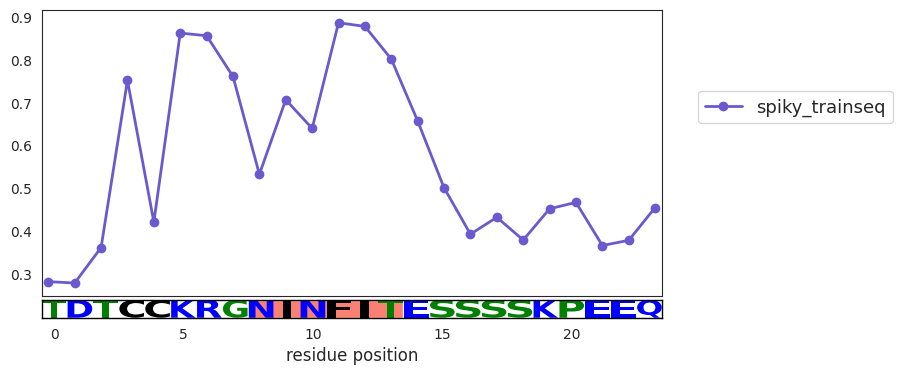

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  # Create subplots with specified height ratios and no vertical space between subplots
ax1.plot(data_arr[pos_in_df, :], color='slateblue', lw=2, label='spiky_trainseq', marker='o')
#ax1.plot(data_df[data_df['name'] == name]['smooth_prob'].reset_index(drop=True), color='k', lw=2, label='smooth_randpad')

input_string = seq
wt_seq = input_string
count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
ax1.set_xlim([0-0.25,len(input_string)-1+0.25])

logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
if label == 0:
    logo_wt.highlight_position_range(pmin=start_pos, pmax=start_pos+5, color='lightgreen')
if label == 1:
    logo_wt.highlight_position_range(pmin=start_pos, pmax=start_pos+5, color='salmon')

logo_wt.ax.set_title('')
logo_wt.ax.xaxis.set_ticks_position('none')
logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
logo_wt.ax.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
fig.legend(bbox_to_anchor=(1.2, 0.7), fontsize=13)
plt.xlabel('residue position', fontsize=12)

plt.show()